In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

In [20]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=100):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
with open(r"C:\Users\mituc\Python\attack_classifier\data\kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [4]:
cols = """duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot,
num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations,
num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate,
srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate,dst_host_count, 
dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [5]:
columns

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

In [6]:
with open(r"C:\Users\mituc\Python\attack_classifier\data\training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [7]:
attacks_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}

In [8]:
path = r"C:\Users\mituc\Python\attack_classifier\data\kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [9]:
df.shape

(494021, 43)

The data set has various features to identify whether a traffic is an attack or a normal connection. The target class consist of different types of attacks smurf, neptune, back, satan, ipsweep, portsweep, warezclient, teardrop, pod, nmap, guess_passwd, buffer_overflow, land, warezmaster, imap, rootkit, loadmodule, ftp_write, multihop, phf, perl, spy. All those attacks are fall into the main categories of:

- DOS: denial-of-service, e.g. syn flood
- R2L: unauthorized access from a remote machine, e.g. guessing password
- U2R: unauthorized access to local superuser (root) privileges, e.g., various buffer overflow attacks
- probing: surveillance and other probing, e.g., port scanning

The dataset consist of 41 features(independent variable) to classify the trafic into its specific type denoted by status variable(dependent variable). The input features listed as follows:

    - duration: duration of the connection in seconds (continuous)
    - protocol_type: protocol type, e.g., tcp, udp (discrete)
    - service: network service on the destination, e.g., http, ftp, etc. (discrete)
    - src_bytes: number of bytes sent from source to destination (continuous)
    - dst_bytes: number of bytes sent from destination to source (continuous)
    - flag: normal or error status of the connection (discrete)
    - land: 1 if connection is from /to the same host/port; 0 otherwise (discrete)
    - wrong_fragment: number of incorrect fragments (continuous)
    - urgent: number of urgent packets (continuous)
    - hot: number of hot indicators (continuous)
    - num_failed_logins: number of failed login attempts (continuous)
    - logged_in: 1 if successfully logged in; 0 otherwise (discrete)
    - num_compromised: number of compromised conditions (continuous)
    - root_shell: 1 if root shell is obtained; 0 otherwise (discrete)
    - su_attempted: 1 if su root command attempted; 0 otherwise (discrete)
    - num_root: number of root accesses (continuous)
    - num_file_creations: number of file creation operations (continuous)
    - num_shells: number of shell promts (continuous)
    - num_access_files: number of operations on access control files (continuous)
    - num_outbound_cmds: number of outbound commands in a ftp session (continuous)
    - is_host_login: 1 if the login is performed from the same host; 0 otherwise (discrete)
    - is_guest_login: 1 if the login is performed from a guest account; 0 otherwise (discrete)
    - count: number of connections to the same host as the current connection in the past two seconds (continuous)

*Note: the following features refer to the same host connections*

    - serror_rate: % of connections that have SYN errors (continuous)
    - rerror_rate: % of connections that have REJ errors (continuous)
    - same_srv_rate: % of connections to the same service (continuous)
    - diff_srv_rate: % of connections to different services (continuous)
    - srv_count: number of connections to the same service as the current connection in the past two seconds (continuous)

*Note: the following features refer to the same service connections*

    - srv_serror_rate: % of connections that have SYN errors (continuous)
    - srv_rerror_rate: % of connections that have REJ errors (continuous)
    - srv_diff_host_rate: % of connections to different hosts (continuous)

In [11]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [19]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [20]:
df.dtypes
# protocol_type, service, flag, target and Attack Type should be encoded

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

dos is the most common attack by far and smurf the most common target for dos attacks.

In [21]:
df.isnull().sum()
# There is no nulls in the dataframe

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [23]:
df.duplicated().sum()

348435

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.979302,707.746472,0.0,0.00,0.0,0.00,58329.0
src_bytes,494021.0,3025.610296,988218.101045,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494021.0,868.532425,33040.001252,0.0,0.00,0.0,0.00,5155468.0
land,494021.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
wrong_fragment,494021.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494021.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494021.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494021.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494021.0,0.148247,0.355345,0.0,0.00,0.0,0.00,1.0
num_compromised,494021.0,0.010212,1.798326,0.0,0.00,0.0,0.00,884.0


In [12]:
categorical = df.select_dtypes(include=['object'])
categorical.head(5)

,protocol_type,service,flag,target,Attack Type
0,tcp,http,SF,normal.,normal
1,tcp,http,SF,normal.,normal
2,tcp,http,SF,normal.,normal
3,tcp,http,SF,normal.,normal
4,tcp,http,SF,normal.,normal


In [13]:
numerical = df._get_numeric_data()
numerical.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


Saving figure categorical_plots


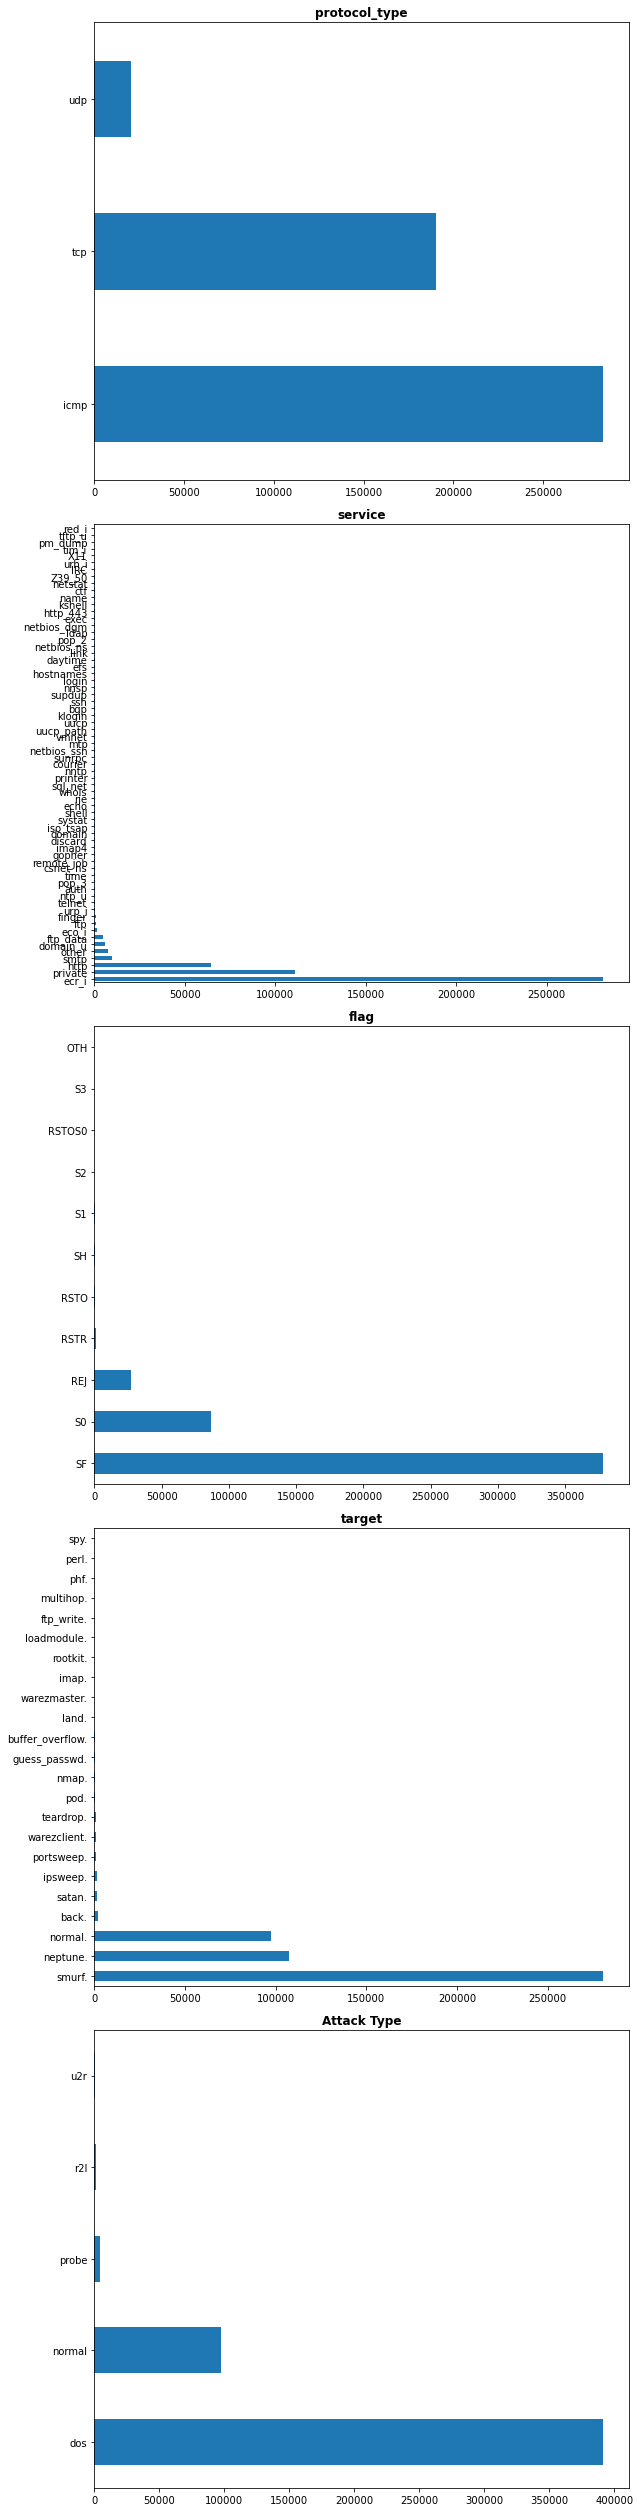

In [21]:
# Visualization of categorical data

fig, axes = plt.subplots(5, 1, figsize = (9,35))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout()
save_fig("categorical_plots");

Saving figure numerical_plots


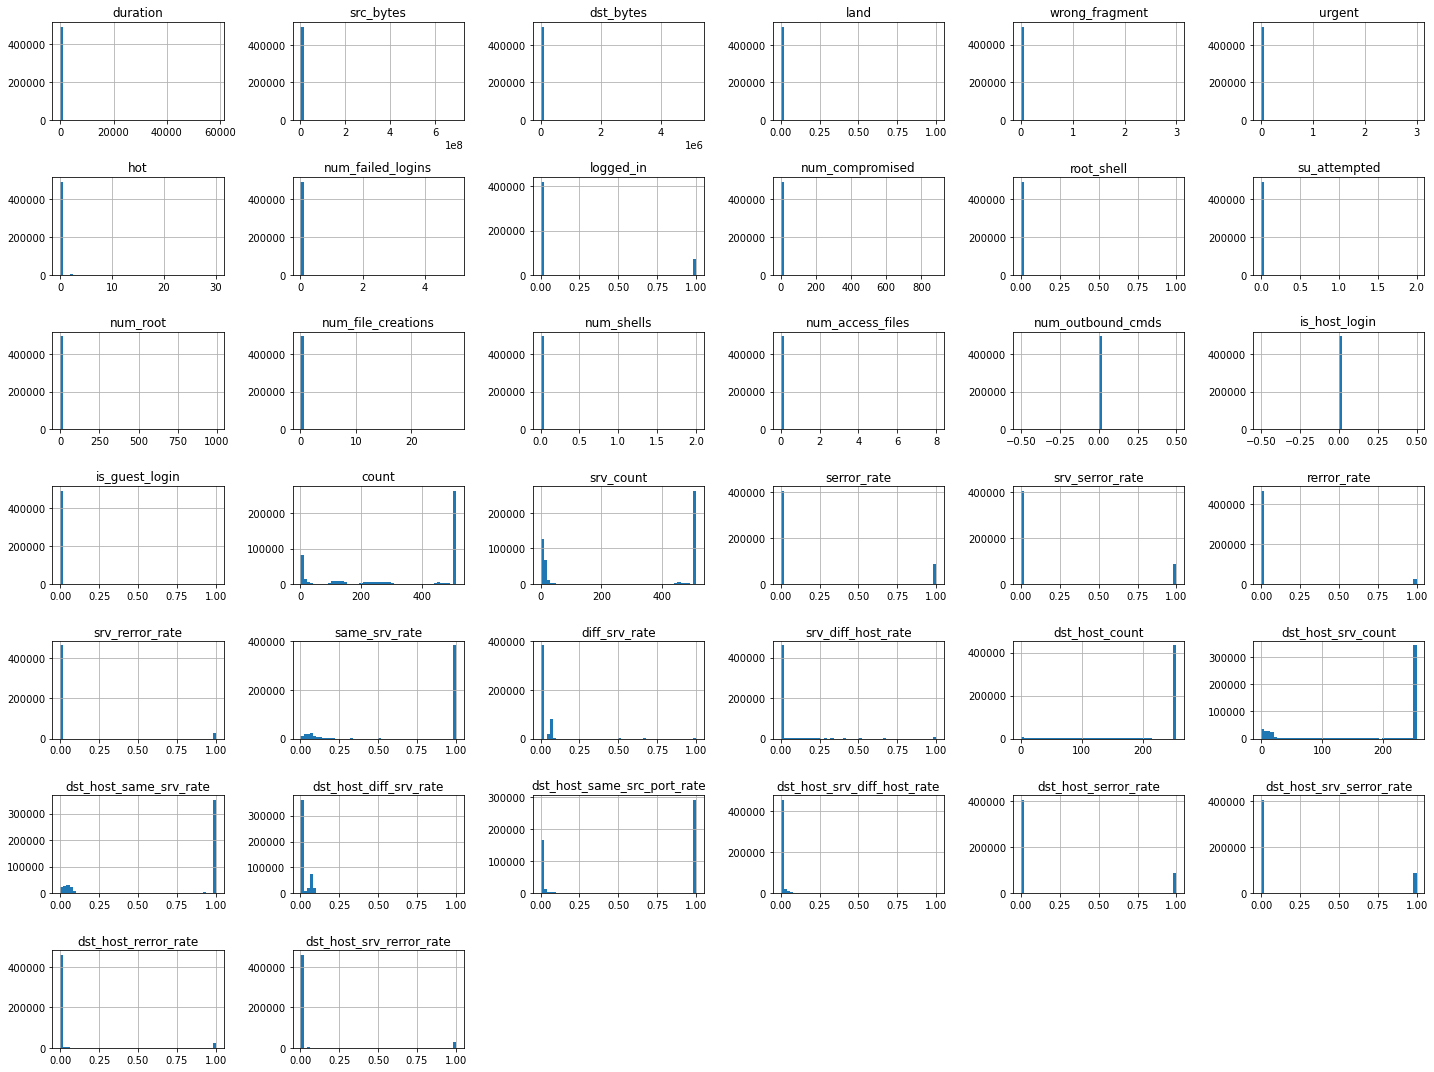

In [22]:
df.hist(bins = 50, figsize = (20,15))
save_fig("numerical_plots")
plt.show()

C:\Users\mituc\AppData\Local\Temp/ipykernel_18588/166633917.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))


Saving figure corr_heatmap


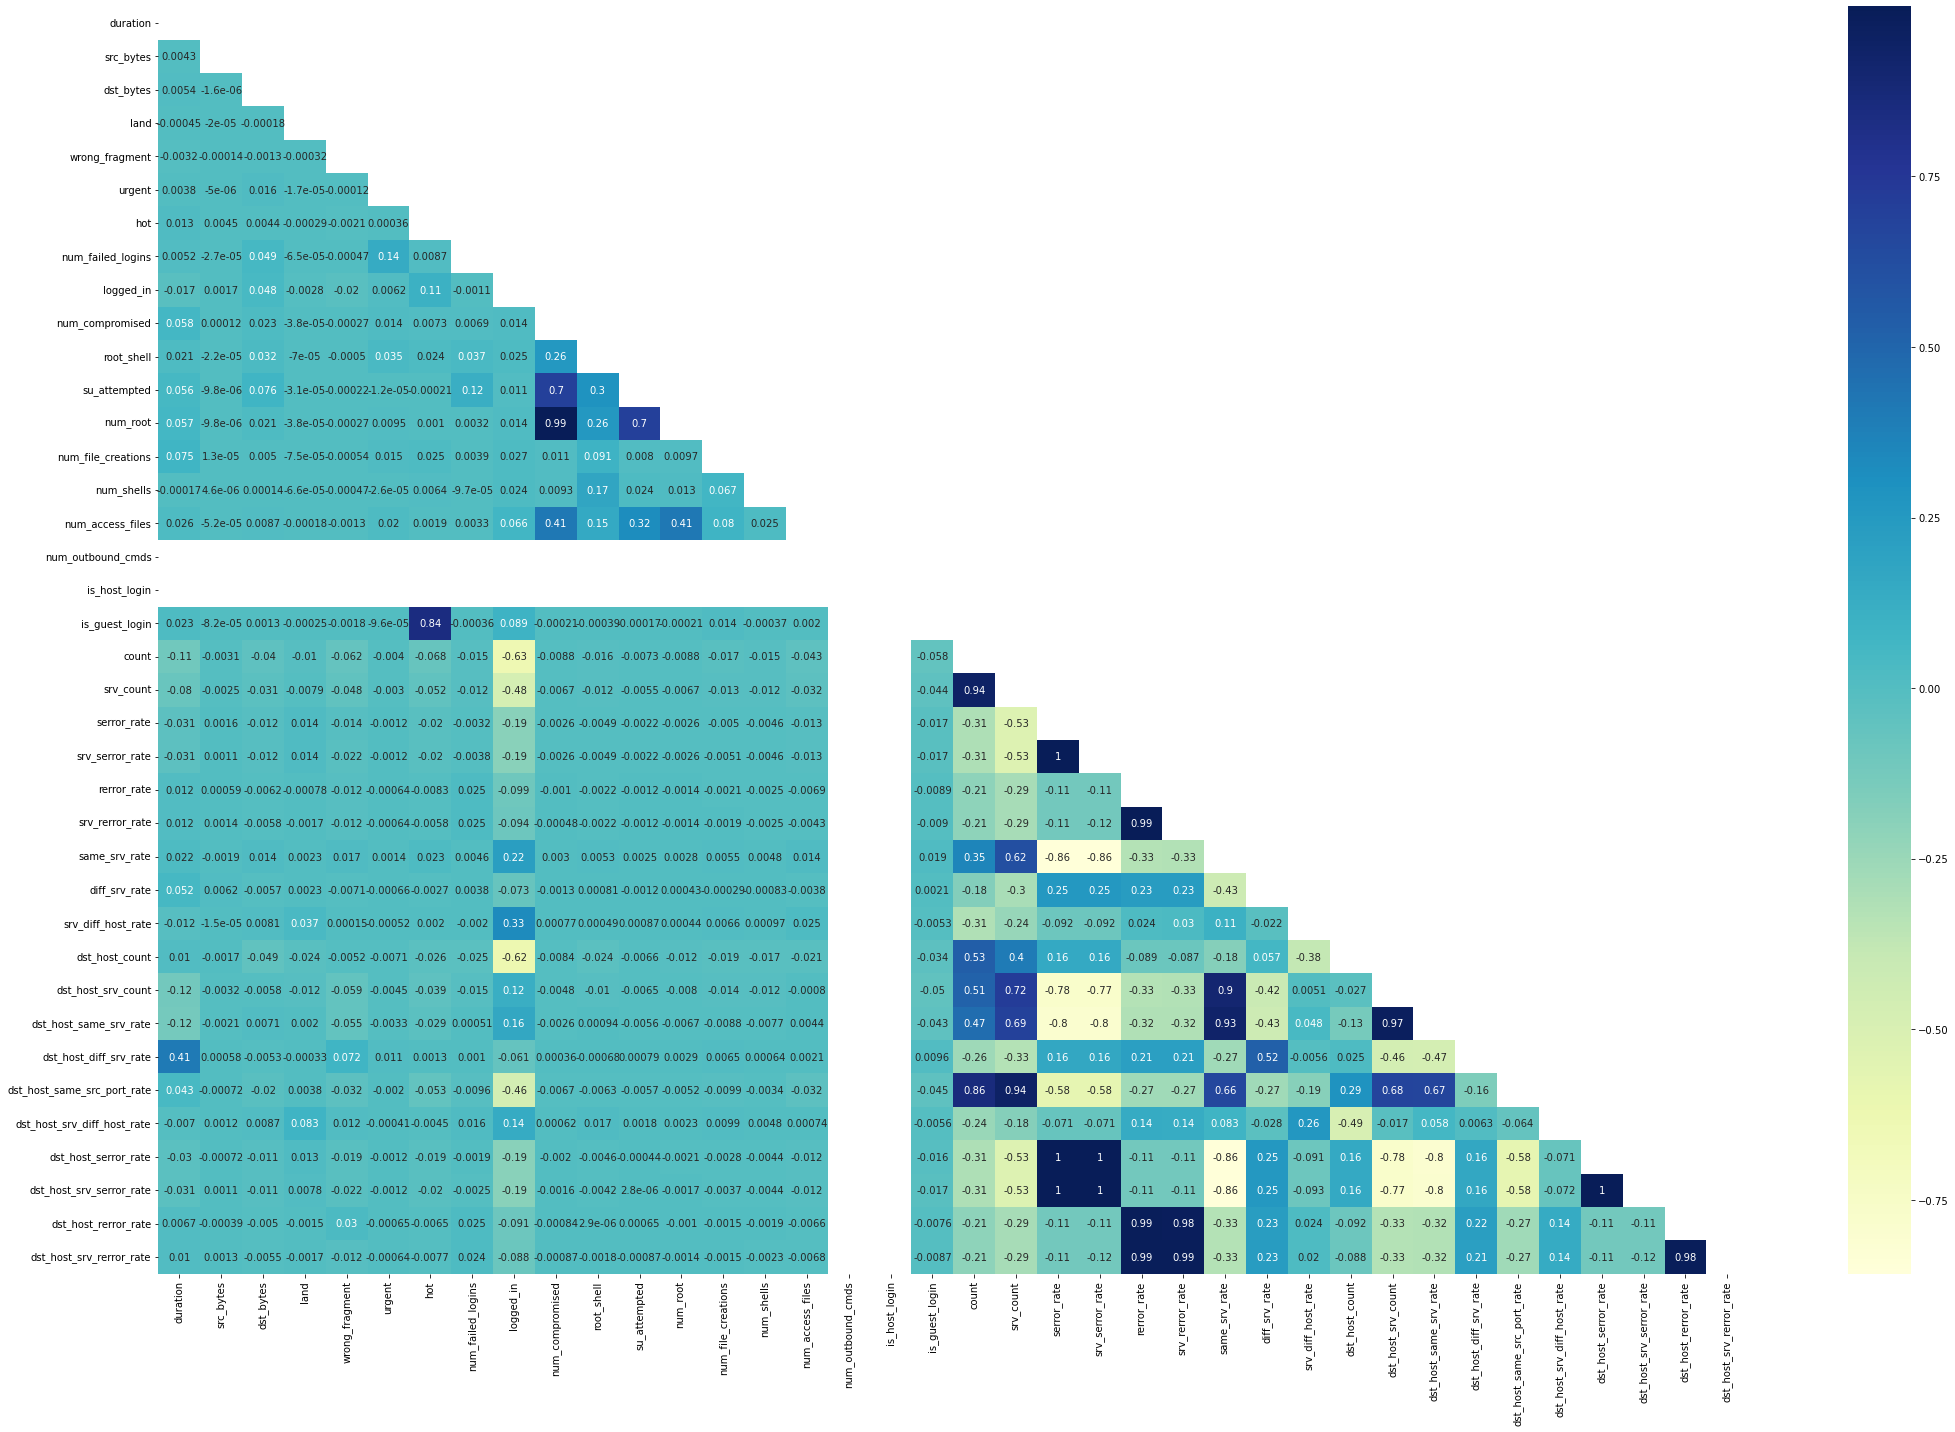

In [24]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True)
save_fig("corr_heatmap")
plt.show();

Now we'll drop the variables that are not useful for our analysis because they are extreamly correlated with each other.

In [25]:
df.drop('num_root',axis = 1,inplace = True) # We'll keep num_compromised
df.drop('srv_serror_rate',axis = 1,inplace = True) # We'll keep serror_rate
df.drop('srv_rerror_rate',axis = 1, inplace=True) # We'll keep rerror_rate
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True) # We'll keep  srv_serror_rate
df.drop('dst_host_serror_rate',axis = 1, inplace=True) # We'll keep rerror_rate
df.drop('dst_host_rerror_rate',axis = 1, inplace=True) # We'll keep srv_rerror_rate
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True) # We'll keep rerror_rate
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True) # We'll keep dst_host_srv_count
df.drop('dst_host_same_src_port_rate', axis = 1, inplace=True) # We'll keep srv_count
df.drop('dst_host_srv_count', axis = 1, inplace=True) # We'll keep same_srv_rate
df.drop('count', axis = 1, inplace=True) # We'll keep srv_count
df.drop('hot', axis = 1, inplace=True) # We'll keep is_guest_login

In [29]:
df.shape

(494021, 31)

In [31]:
df.to_csv(r"data\df_attacks.csv")